In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [24]:
initial_concentrations = np.array([2, 5, 6, 6, 11, 14, 16, 24])  # mmol/m^3
outlet_concentrations = np.array([0.5, 3, 1, 2, 6, 10, 8, 4])    # mmol/m^3
residence_times = np.array([30, 1, 50, 8, 4, 20, 20, 4])         # minutes

In [25]:
inverse_reaction_rate = residence_times / (initial_concentrations - outlet_concentrations)

In [26]:
sorted_indices = np.argsort(outlet_concentrations)
sorted_concentrations = outlet_concentrations[sorted_indices]
sorted_inverse_rate = inverse_reaction_rate[sorted_indices]


In [27]:
smooth_concentrations = np.linspace(sorted_concentrations.min(), sorted_concentrations.max(), 300)
smooth_inverse_rate = make_interp_spline(sorted_concentrations, sorted_inverse_rate, k=3)(smooth_concentrations)

 Part (a)



In [28]:
input_concentration = 6.6  # mmol/m^3
initial_concentration = 10  # mmol/m^3
recycle_ratio = (initial_concentration - input_concentration) / (input_concentration - 1)
reactor_volume = (10 - 1) * 1.2 * 0.1
recycle_flow_rate = 0.1 * recycle_ratio


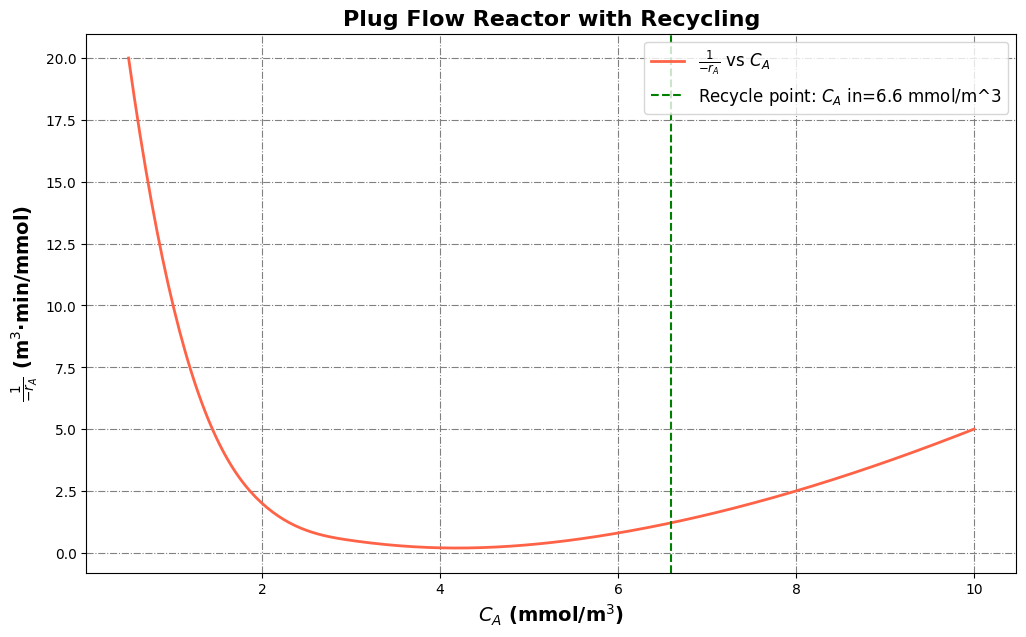

In [29]:
plt.figure(figsize=(12, 7))
plt.plot(smooth_concentrations, smooth_inverse_rate, label=r'$\frac{1}{-r_A}$ vs $C_A$', color='#FF6347', linewidth=2)
plt.axvline(x=input_concentration, color='green', linestyle='--', label=f'Recycle point: $C_A$ in={input_concentration} mmol/m^3')
plt.xlabel(r'$C_A$ (mmol/m$^3$)', fontsize=14, fontweight='bold')
plt.ylabel(r'$\frac{1}{-r_A}$ (m$^3$·min/mmol)', fontsize=14, fontweight='bold')
plt.title("Plug Flow Reactor with Recycling", fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='-.', color='gray', linewidth=0.8)
plt.show()

In [30]:

print("Part (a) Results:")
print("Recycle ratio (R):", recycle_ratio)
print("Reactor volume (V):", reactor_volume, "m^3")
print("Recycle flow rate (vR):", recycle_flow_rate, "m^3/min")

Part (a) Results:
Recycle ratio (R): 0.6071428571428572
Reactor volume (V): 1.0799999999999998 m^3
Recycle flow rate (vR): 0.06071428571428572 m^3/min


In [31]:
volume_single_tank = residence_times[0] * 0.1
volume_first_tank = 5.92 * 0.1
volume_second_tank = 16 * 0.1
total_volume_two_tanks = volume_first_tank + volume_second_tank

Part(b)

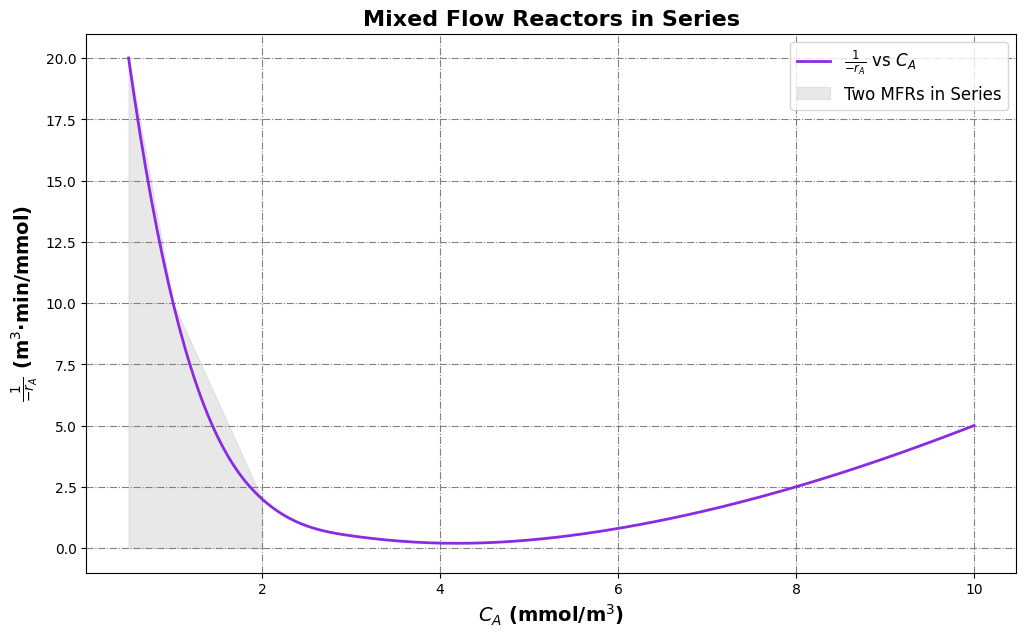

In [32]:
plt.figure(figsize=(12, 7))
plt.plot(smooth_concentrations, smooth_inverse_rate, color='#8A2BE2', label=r'$\frac{1}{-r_A}$ vs $C_A$', linewidth=2)
plt.fill_between(sorted_concentrations[:3], sorted_inverse_rate[:3], color='lightgray', alpha=0.5, label="Two MFRs in Series")
plt.xlabel(r'$C_A$ (mmol/m$^3$)', fontsize=14, fontweight='bold')
plt.ylabel(r'$\frac{1}{-r_A}$ (m$^3$·min/mmol)', fontsize=14, fontweight='bold')
plt.title("Mixed Flow Reactors in Series", fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='-.', color='gray', linewidth=0.8)
plt.show()

In [33]:
print("\nPart (b) Results:")
print("Total volume for two reactors:", total_volume_two_tanks, "m^3")
print("First reactor volume:", volume_first_tank, "m^3")
print("Second reactor volume:", volume_second_tank, "m^3")


Part (b) Results:
Total volume for two reactors: 2.192 m^3
First reactor volume: 0.592 m^3
Second reactor volume: 1.6 m^3


Part(c)

In [34]:
mixed_flow_volume = 0.1 * 1.2
plug_flow_volume = 0.1 * 5.8
total_volume_combined = mixed_flow_volume + plug_flow_volume


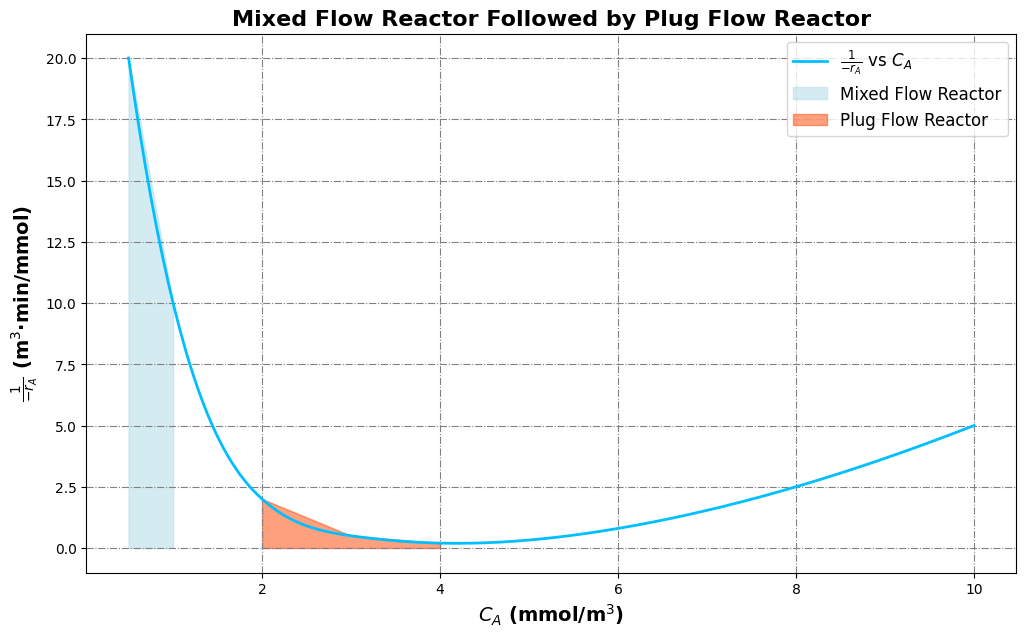

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(smooth_concentrations, smooth_inverse_rate, color='#00BFFF', label=r'$\frac{1}{-r_A}$ vs $C_A$', linewidth=2)
plt.fill_between(sorted_concentrations[:2], sorted_inverse_rate[:2], color='lightblue', alpha=0.5, label="Mixed Flow Reactor")
plt.fill_between(sorted_concentrations[2:5], sorted_inverse_rate[2:5], color='#FF4500', alpha=0.5, label="Plug Flow Reactor")
plt.xlabel(r'$C_A$ (mmol/m$^3$)', fontsize=14, fontweight='bold')
plt.ylabel(r'$\frac{1}{-r_A}$ (m$^3$·min/mmol)', fontsize=14, fontweight='bold')
plt.title("Mixed Flow Reactor Followed by Plug Flow Reactor", fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='-.', color='gray', linewidth=0.8)
plt.show()

In [36]:
print("\nPart (c) Results:")
print("Total volume for combined reactors:", total_volume_combined, "m^3")


Part (c) Results:
Total volume for combined reactors: 0.7 m^3
